# 교호작용(상호작용: interaction)
- 설명변수끼리의 상호작용을 고려해 상호곱 변수 생성, 그 중 의미 있는 변수를 추출하기 위함
- 적은 설명변수로 많은 설명변수로의 확장 가능(설명변수 추가 없이)
- 초기 변수 연구 단계에서 고려되는 기법
- 대체적으로 2변수 결합이 가장 많음  
```
예제1 )
x1, x2, x3
1) 2차항 고려: x1^2, x2^2, x3^2, x1x2, x1x3, x2x3
2) 3차항 고려: x1^2, x2^2, x3^2, x1x2, x1x3, x2x3
              x1^3, x2^3, x3^3, x1^2x2, ... , x2x3^2, x1x2x3
예제2 ) 게임 이탈 예측
게임 회사 신규게임에 대한 이탈 요인/여부 예측 필요
킬수 모델에 적용   ->   변수를 변형하여 모델에 적용   ->  예측력이 올라감
                  (게임 수 대비 킬수, 시간수 대비 킬수)
```

> Interaction: Iris data

In [23]:
# tree boundary를 그리게 하는 함수 생성
def visualize_boundary(estimator, X, y):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3);
    ax.axis('tight')
    ax.axis('off')
    
    estimator.fit(X, y)
    
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()        
    
    xx, yy = np.meshgrid( np.arange(xlim_start, xlim_end, 0.02),
                          np.arange(ylim_start, ylim_end, 0.02))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5,
                           levels=np.arange(len(np.unique(y)) + 1) - 0.5,
                           cmap='rainbow');

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 1. 데이터 로딩 및 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# 2. interaction 모델 생성
m_poly = PolynomialFeatures(degree=2)  # 2차항 생성

# 3. 모델에 데이터 학습 -> 설명변수 변환기준 찾기
# 설명변수를 증가함: x1, x2 => x1x1, x1x2, x2x2
m_poly.fit(X_train) 

# 4. 실데이터 변환(교호작용 기준에 맞게 설명변수 변환)
train_x_poly= m_poly.transform(X_train) # x에 해당하는 값들을 변환시킴

# 5. 변환된 변수 형태 확인
m_poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [6]:
m_poly.get_feature_names(iris.feature_names)

['1',
 'sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)^2',
 'sepal length (cm) sepal width (cm)',
 'sepal length (cm) petal length (cm)',
 'sepal length (cm) petal width (cm)',
 'sepal width (cm)^2',
 'sepal width (cm) petal length (cm)',
 'sepal width (cm) petal width (cm)',
 'petal length (cm)^2',
 'petal length (cm) petal width (cm)',
 'petal width (cm)^2']

In [24]:
# 6. 확장된 데이터셋으로 tree 모델 적용
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(min_samples_leaf= 5)
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

0.8947368421052632


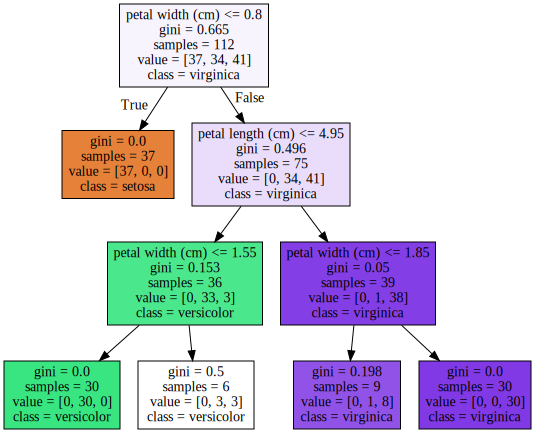

In [25]:
# 확장하지 않은 데이터셋 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_graph= export_graphviz(tree, class_names=iris.target_names, 
               feature_names = iris.feature_names, impurity=True, filled=True)
graphviz.Source(dot_graph)

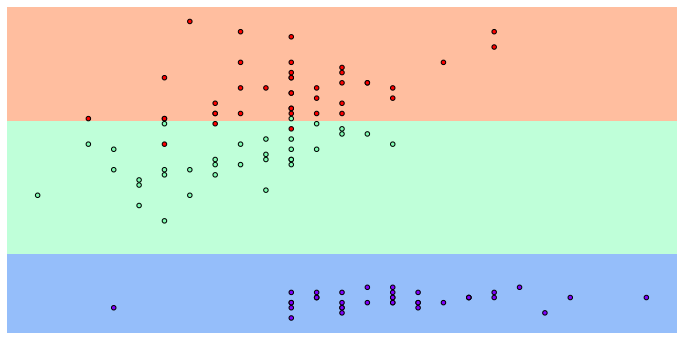

In [36]:
visualize_boundary(tree, X_train[:,1:3], y_train)

In [37]:
tree= DecisionTreeClassifier(min_samples_leaf= 5)
tree.fit(train_x_poly, y_train)
test_x_poly= m_poly.transform(X_test)    # dimention을 맞추어주기 위해 꼭 필요!
tree.score(test_x_poly, y_test)

0.9736842105263158

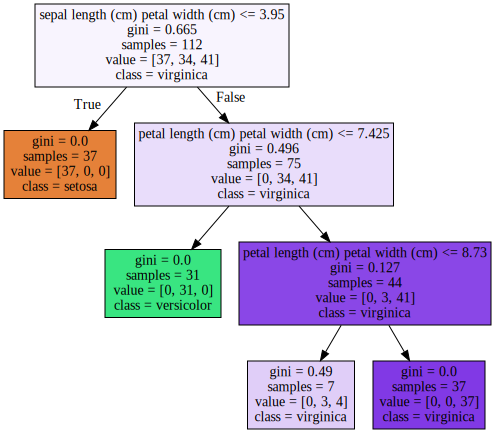

In [38]:
from sklearn.tree import export_graphviz
import graphviz

dot_graph= export_graphviz(tree, class_names=iris.target_names, 
               feature_names = m_poly.get_feature_names(iris.feature_names), impurity=True, filled=True)
graphviz.Source(dot_graph)

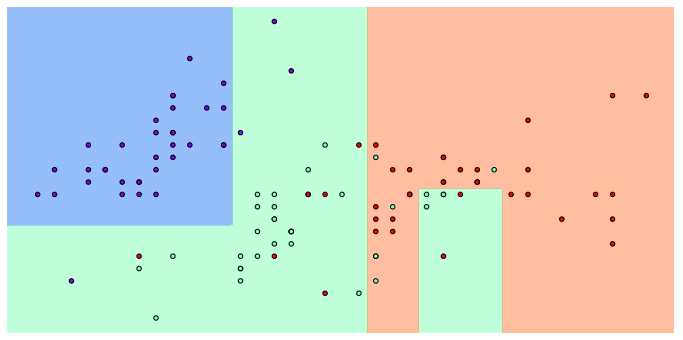

In [39]:
visualize_boundary(tree, train_x_poly[:,1:3], y_train)

> Interaction: cancer data

In [82]:
# 1. 데이터 로딩 및 분할
from sklearn.datasets import load_breast_cancer 
cancer= load_breast_cancer()

X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

# 2. 2차원 추가 변수 형태 변경
m_poly= PolynomialFeatures(degree=2)
m_poly.fit(X_train)

X_train_poly= m_poly.transform(X_train)
X_test_poly= m_poly.transform(X_test)

cancer_poly_col= m_poly.get_feature_names(cancer.feature_names) # 확장된 data set에 컬럼 이름 순차적으로 정렬

# 3. 확장된 데이터셋으로 randomforest 적용
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print(np.round(rf_clf.score(X_test, y_test), 3))

rf_clf= RandomForestClassifier()
rf_clf.fit(X_train_poly, y_train)
print(np.round(rf_clf.score(X_test_poly, y_test), 3))


0.972
0.958


- 상호작용 변수를 늘린다고 무조건 더 좋아지는 것은 아니다.(overfitting 문제)
- PCA등과 같은 차원축소 기법도 고려해야 할 데이터가 존재한다.